In [1]:
import sklearn
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import mixture
import numpy as np
import pylab as pl
import skimage.io as SKimg
import scipy.io as sio

import math
import sys
import ALLNeighborhoodrelationship as ABL
import MatrixNeighborhood  as MNB

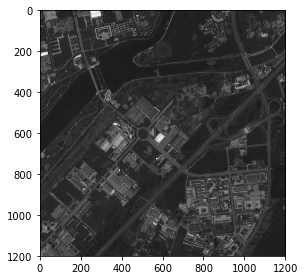

In [2]:
#读取tiff影像
Tpan =SKimg.imread("F:/pythontestdata/MyTiff/tianhui1200pan.tif")
SKimg.imshow(Tpan)
SKimg.show()
Tpan.shape

Rows=Tpan.shape[0]; Cols=Tpan.shape[1]; 
NewTpan=np.array(Tpan.reshape(Rows*Cols,1));

TpanOne=Tpan.flatten();

In [3]:
#matlab文件名  
matfn='gt_tianhui1200.mat';
data=sio.loadmat(matfn);
mk = data['gt']
print(mk)

[[6 6 4 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]]


In [4]:
GMMmy = mixture.GaussianMixture(n_components=7,covariance_type='full',max_iter=500).fit(NewTpan);
Labels=GMMmy.predict(NewTpan);  Clus_Centers=GMMmy.means_;  weights_=GMMmy.weights_;
covariances_ =GMMmy.covariances_;        precisions_ =GMMmy.precisions_;   
Score=GMMmy.score(NewTpan);

#一维高斯概率密度函数
def OneDimentionGB(X,u,s):
    ALLF=[];
    for IX in range(0,len(X)):
        f=math.exp(-math.pow((X[IX]-u),2)/2*s)/math.sqrt(2*math.pi*s); ALLF.append(f);
    return ALLF;    

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [2 1 1 ..., 0 0 0]
 [2 2 1 ..., 0 0 0]]


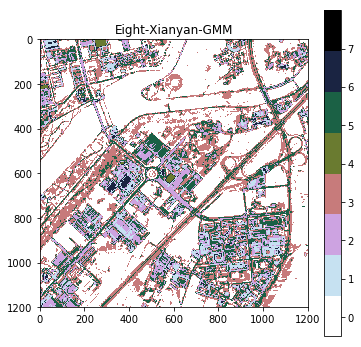

In [5]:
finaLabel=mk-2;
for HL in range(0,len(Labels)):
    h=math.floor(HL/1200); l=HL%1200;
    finaLabel[h][l]=Labels[HL];
# 成图展示
mylabel=finaLabel;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-GMM');
plt.show();

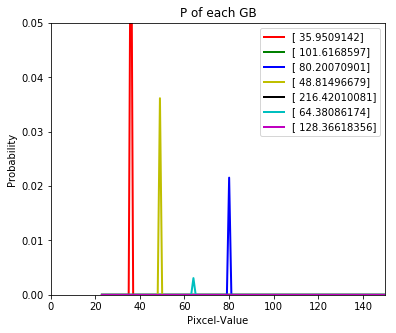

In [6]:
X=np.arange(0,255);    ALLGBfrency=[];
cor=['r','g','b','y','k','c','m'];
plt.figure(figsize=(6,5));
for i in range(0,len(Clus_Centers)):
    Uvalue=np.unique(TpanOne,return_index=True,return_inverse=True,return_counts = True)[0];
    Uinverse=np.unique(TpanOne,return_index=True,return_inverse=True,return_counts = True)[2];
    f=OneDimentionGB(Uvalue,Clus_Centers[i],covariances_[i]);  f=np.array(f);
    frency=f[Uinverse];     ALLGBfrency.append(frency);
    plt.plot(Uvalue,f,label=Clus_Centers[i],color=cor[i],linewidth=2);
plt.xlabel("Pixcel-Value");  plt.ylabel("Probability");   plt.xlim(0,150);  plt.ylim(0,0.05);
plt.title("P of each GB");
plt.legend(); plt.show();

# 第一次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


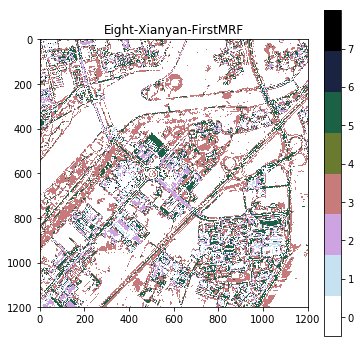

In [7]:
PPB=MNB.PPBeight(finaLabel);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

FirstMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    FirstMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=FirstMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-FirstMRF');
plt.show();

# 第二次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


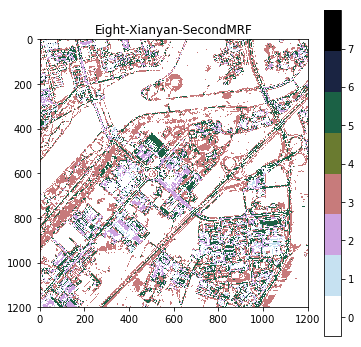

In [8]:
PPB=MNB.PPBeight(FirstMRF);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

SecondMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    SecondMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=SecondMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-SecondMRF');
plt.show();

# 第三次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


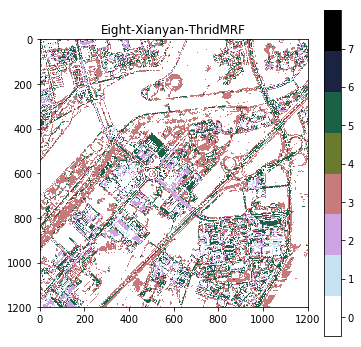

In [9]:
PPB=MNB.PPBeight(SecondMRF);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

ThridMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    ThridMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=ThridMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-ThridMRF');
plt.show();

# 第四次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


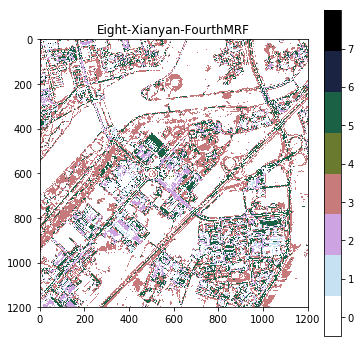

In [10]:
PPB=MNB.PPBeight(ThridMRF);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

FourthMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    FourthMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=FourthMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-FourthMRF');
plt.show();

# 第五次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


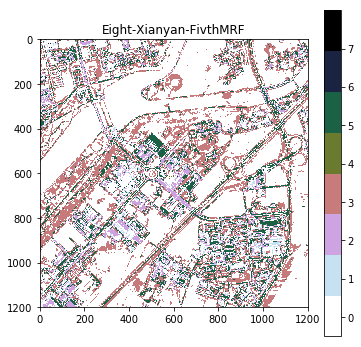

In [11]:
PPB=MNB.PPBeight(FourthMRF);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

FivthMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    FivthMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=FivthMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-FivthMRF');
plt.show();

# 第六次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


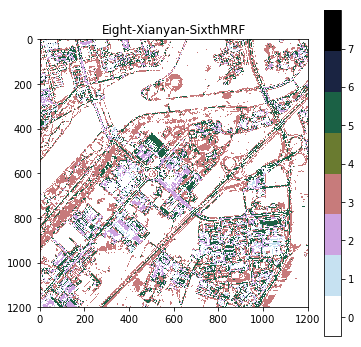

In [12]:
PPB=MNB.PPBeight(FivthMRF);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

SixthMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    SixthMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=SixthMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-SixthMRF');
plt.show();

# 第七次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


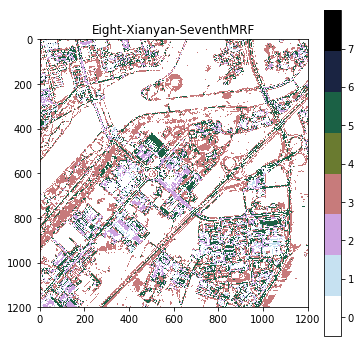

In [13]:
PPB=MNB.PPBeight(SixthMRF);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

SeventhMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    SeventhMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=SeventhMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-SeventhMRF');
plt.show();

# 第八次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


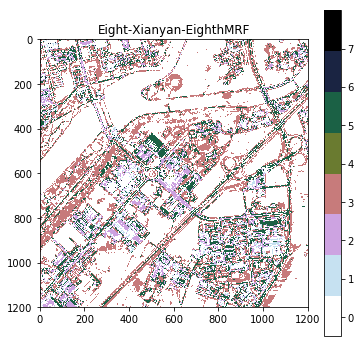

In [14]:
PPB=MNB.PPBeight(SeventhMRF);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

EighthMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    EighthMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=EighthMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-EighthMRF');
plt.show();

# 第九次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


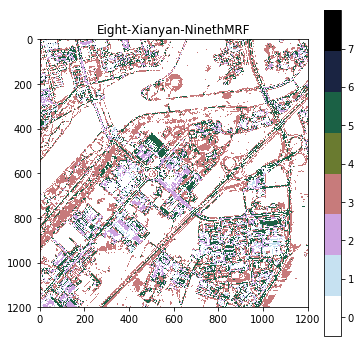

In [15]:
PPB=MNB.PPBeight(EighthMRF);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

NinethMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    NinethMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=NinethMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-NinethMRF');
plt.show();

# 第十次MRF迭代

[[0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [2 0 1 ..., 0 0 0]]


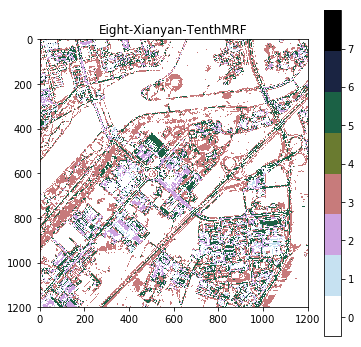

In [16]:
PPB=MNB.PPBeight(NinethMRF);
L0F=np.sum((PPB==0),axis=0)/8;
L1F=np.sum((PPB==1),axis=0)/8;
L2F=np.sum((PPB==2),axis=0)/8;
L3F=np.sum((PPB==3),axis=0)/8;
L4F=np.sum((PPB==4),axis=0)/8;
L5F=np.sum((PPB==5),axis=0)/8;
L6F=np.sum((PPB==6),axis=0)/8;

ALLPP=[L0F,L1F,L2F,L3F,L4F,L5F,L6F];

ALLpost=[];
for j in range(0,len(ALLPP)):
    TEMPpost=(ALLGBfrency[j]+0)*ALLPP[j];
    ALLpost.append(TEMPpost);

LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for n in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;      tempF=[];
    for a in range(0,len(ALLpost)):
        tempF.append(ALLpost[a][n]);
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k;
    LastLabel[n]=maxindex;

TenthMRF=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    TenthMRF[h][l]=LastLabel[HL];

# 成图展示
mylabel=TenthMRF;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',8));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
#cbar.set_ticklabels()
plt.clim(-0.5,8)
plt.title('Eight-Xianyan-TenthMRF');
plt.show();